In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import image
import pickle
import numpy as np

## CS: recovery error graph ; no noise

In [2]:
with open(r'cs_dae/results/cs_no_noise/celebA/norm_diffs.pickle', "rb") as input_file:
    a = pickle.load(input_file)

In [3]:
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/250/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm250 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/500/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/1000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/1500/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/2000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm2000 = pickle.load(input_file)

In [4]:
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/250/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct250 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/500/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/1000/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/1500/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/2000/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct2000 = pickle.load(input_file)

In [5]:
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/250/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv250 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/500/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/1000/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/1500/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.0/2000/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv2000 = pickle.load(input_file)

In [6]:
with open(r'pgdgan-master/estimated/celebA/full-input/gaussian/250/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_10_100_1/l2_losses.pkl', "rb") as input_file:
    pgd250 = pickle.load(input_file)
with open(r'pgdgan-master/estimated/celebA/full-input/gaussian/500/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_10_100_1/l2_losses.pkl', "rb") as input_file:
    pgd500 = pickle.load(input_file)
with open(r'pgdgan-master/estimated/celebA/full-input/gaussian/1000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_10_100_1/l2_losses.pkl', "rb") as input_file:
    pgd1000 = pickle.load(input_file)
with open(r'pgdgan-master/estimated/celebA/full-input/gaussian/1500/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_10_100_1/l2_losses.pkl', "rb") as input_file:
    pgd1500 = pickle.load(input_file)
with open(r'pgdgan-master/estimated/celebA/full-input/gaussian/2000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_10_100_1/l2_losses.pkl', "rb") as input_file:
    pgd2000 = pickle.load(input_file)

In [7]:
ipt250 = a[250]
ipt500 = a[500]
ipt1000 =a[1000]
ipt1500 =a[1500]
ipt2000 = a[2000]

In [8]:
ipt_imgs = [182674, 182665, 182692, 182681, 182645, 182667, 182640,182694,182699, 182679]
others = [a - 182638 for a in ipt_imgs]

In [9]:
csgm250 = csgm250.values()
csgm500 = csgm500.values()
csgm1000 = csgm1000.values()
csgm1500 = csgm1500.values()
csgm2000= csgm2000.values()
csgm250 = [csgm250[others[i]] for i in range(10)]
csgm500 = [csgm500[others[i]] for i in range(10)]
csgm1000 = [csgm1000[others[i]] for i in range(10)]
csgm1500 = [csgm1500[others[i]] for i in range(10)]
csgm2000 = [csgm2000[others[i]] for i in range(10)]

In [10]:
dct250 = dct250.values()
dct500 = dct500.values()
dct1000 = dct1000.values()
dct1500 = dct1500.values()
dct2000= dct2000.values()
dct250 = [dct250[others[i]] for i in range(10)]
dct500 = [dct500[others[i]] for i in range(10)]
dct1000 = [dct1000[others[i]] for i in range(10)]
dct1500 = [dct1500[others[i]] for i in range(10)]
dct2000 = [dct2000[others[i]] for i in range(10)]

In [11]:
pgd250 = pgd250.values()
pgd500 = pgd500.values()
pgd1000 = pgd1000.values()
pgd1500 = pgd1500.values()
pgd2000= pgd2000.values()
pgd250 = [pgd250[others[i]] for i in range(10)]
pgd500 = [pgd500[others[i]] for i in range(10)]
pgd1000 = [pgd1000[others[i]] for i in range(10)]
pgd1500 = [pgd1500[others[i]] for i in range(10)]
pgd2000 = [pgd2000[others[i]] for i in range(10)]

In [12]:
wv250 = wv250.values()
wv500 = wv500.values()
wv1000 = wv1000.values()
wv1500 = wv1500.values()
wv2000= wv2000.values()
wv250 = [wv250[others[i]] for i in range(10)]
wv500 = [wv500[others[i]] for i in range(10)]
wv1000 = [wv1000[others[i]] for i in range(10)]
wv1500 = [wv1500[others[i]] for i in range(10)]
wv2000 = [wv2000[others[i]] for i in range(10)]

In [13]:
#dd = [nn**2 / 784. for nn in aa]
ipt250 = [vv**2/(64*64*3) for vv in ipt250]
ipt500 = [vv**2/(64*64*3) for vv in ipt500]
ipt1000 = [vv**2/(64*64*3) for vv in ipt1000]
ipt1500 = [vv**2/(64*64*3) for vv in ipt1500]
ipt2000 = [vv**2/(64*64*3) for vv in ipt2000]

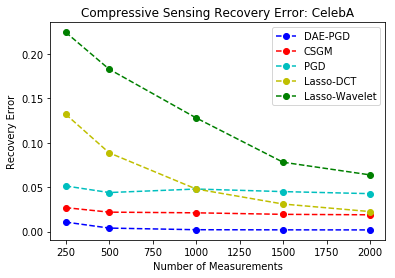

In [14]:
iptplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(ipt250),np.mean(ipt500),np.mean(ipt1000),np.mean(ipt1500),np.mean(ipt2000) ], linestyle='--', marker='o', color='b', label='IPT')
csgmplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(csgm250),np.mean(csgm500),np.mean(csgm1000),np.mean(csgm1500),np.mean(csgm2000) ], linestyle='--', marker='o', color='r', label='CSGM')
pgdplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(pgd250),np.mean(pgd500),np.mean(pgd1000),np.mean(pgd1500),np.mean(pgd2000) ], linestyle='--', marker='o', color='c', label='CSGM')
dctplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(dct250),np.mean(dct500),np.mean(dct1000),np.mean(dct1500),np.mean(dct2000) ], linestyle='--', marker='o', color='y', label='Lasso-DCT')
waveletplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(wv250),np.mean(wv500),np.mean(wv1000),np.mean(wv1500),np.mean(wv2000) ], linestyle='--', marker='o', color='g', label='Lasso-Wavelet')
plt.legend([iptplot, csgmplot,pgdplot, dctplot, waveletplot ], ['DAE-PGD', 'CSGM', 'PGD','Lasso-DCT', 'Lasso-Wavelet'])
plt.ylabel('Recovery Error')
plt.xlabel('Number of Measurements')
plt.title('Compressive Sensing Recovery Error: CelebA')
plt.savefig('cs_recovery_error_celebA.jpg', bbox_inches='tight')
plt.show()



## CS: recovery error graph MNIST ; no noise

In [15]:
with open(r'cs_dae/results/cs_no_noise/mnist/norm_diffs.pickle', "rb") as input_file:
    a = pickle.load(input_file)

In [16]:
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/25/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/l2_losses.pkl', "rb") as input_file:
    csgm250 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/50/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/l2_losses.pkl', "rb") as input_file:
    csgm500 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/100/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/l2_losses.pkl', "rb") as input_file:
    csgm1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/150/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/l2_losses.pkl', "rb") as input_file:
    csgm1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/200/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/l2_losses.pkl', "rb") as input_file:
    csgm2000 = pickle.load(input_file)

In [17]:
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/25/lasso/0.1/l2_losses.pkl', "rb") as input_file:
    dct250 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/50/lasso/0.1/l2_losses.pkl', "rb") as input_file:
    dct500 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/100/lasso/0.1/l2_losses.pkl', "rb") as input_file:
    dct1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/150/lasso/0.1/l2_losses.pkl', "rb") as input_file:
    dct1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/mnist/full-input/gaussian/0.0/200/lasso/0.1/l2_losses.pkl', "rb") as input_file:
    dct2000 = pickle.load(input_file)

In [18]:
ipt250 = a[25]
ipt500 = a[50]
ipt1000 =a[100]
ipt1500 =a[150]
ipt2000 = a[200]

In [19]:
ipt_imgs =  [7986, 2369,  278, 2460, 6217, 8439, 7326, 9675, 4313,  618]
others = range(10)

In [20]:
csgm250 = csgm250.values()
csgm500 = csgm500.values()
csgm1000 = csgm1000.values()
csgm1500 = csgm1500.values()
csgm2000= csgm2000.values()
csgm250 = [csgm250[others[i]] for i in range(10)]
csgm500 = [csgm500[others[i]] for i in range(10)]
csgm1000 = [csgm1000[others[i]] for i in range(10)]
csgm1500 = [csgm1500[others[i]] for i in range(10)]
csgm2000 = [csgm2000[others[i]] for i in range(10)]

In [21]:
dct250 = dct250.values()
dct500 = dct500.values()
dct1000 = dct1000.values()
dct1500 = dct1500.values()
dct2000= dct2000.values()
dct250 = [dct250[others[i]] for i in range(10)]
dct500 = [dct500[others[i]] for i in range(10)]
dct1000 = [dct1000[others[i]] for i in range(10)]
dct1500 = [dct1500[others[i]] for i in range(10)]
dct2000 = [dct2000[others[i]] for i in range(10)]

In [22]:
#dd = [nn**2 / 784. for nn in aa]
ipt250 = [vv**2/(28*28) for vv in ipt250]
ipt500 = [vv**2/(28*28) for vv in ipt500]
ipt1000 = [vv**2/(28*28) for vv in ipt1000]
ipt1500 = [vv**2/(28*28) for vv in ipt1500]
ipt2000 = [vv**2/(28*28) for vv in ipt2000]

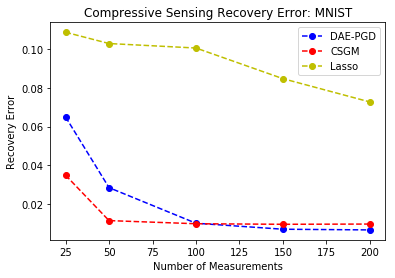

In [23]:
iptplot, = plt.plot([25, 50, 100,150, 200], [np.mean(ipt250),np.mean(ipt500),np.mean(ipt1000),np.mean(ipt1500),np.mean(ipt2000) ], linestyle='--', marker='o', color='b', label='IPT')
csgmplot, = plt.plot([25, 50, 100,150, 200], [np.mean(csgm250),np.mean(csgm500),np.mean(csgm1000),np.mean(csgm1500),np.mean(csgm2000) ], linestyle='--', marker='o', color='r', label='CSGM')
dctplot, = plt.plot([25, 50, 100,150, 200], [np.mean(dct250),np.mean(dct500),np.mean(dct1000),np.mean(dct1500),np.mean(dct2000) ], linestyle='--', marker='o', color='y', label='Lasso')
plt.legend([iptplot, csgmplot, dctplot ], ['DAE-PGD', 'CSGM', 'Lasso', 'Lasso-Wavelet'])
plt.ylabel('Recovery Error')
plt.xlabel('Number of Measurements')
plt.title('Compressive Sensing Recovery Error: MNIST')
plt.savefig('cs_recovery_error_mnist.jpg',bbox_inches='tight')
plt.show()



## CS: recovery error graph ; with noise

In [24]:
with open(r'cs_dae/results/cs_noise/celebA/norm_diffs.pickle', "rb") as input_file:
    a = pickle.load(input_file)

In [25]:
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/250/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm250 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/500/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/1000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/1500/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/2000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/l2_losses.pkl', "rb") as input_file:
    csgm2000 = pickle.load(input_file)

In [26]:
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/250/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct250 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/500/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/1000/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/1500/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/2000/lasso-dct/0.1/l2_losses.pkl', "rb") as input_file:
    dct2000 = pickle.load(input_file)

In [27]:
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/250/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv250 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/500/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/1000/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv1000 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/1500/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv1500 = pickle.load(input_file)
with open(r'csgm-master/estimated/celebA/full-input/gaussian/0.5/2000/lasso-wavelet/0.1/l2_losses.pkl', "rb") as input_file:
    wv2000 = pickle.load(input_file)

In [28]:
ipt250 = a[250]
ipt500 = a[500]
ipt1000 =a[1000]
ipt1500 =a[1500]
ipt2000 = a[2000]

In [29]:
ipt_imgs = [182674, 182665, 182692, 182681, 182645, 182667, 182640,182694,182699, 182679]
others = [a - 182638 for a in ipt_imgs]

In [30]:
csgm250 = csgm250.values()
csgm500 = csgm500.values()
csgm1000 = csgm1000.values()
csgm1500 = csgm1500.values()
csgm2000= csgm2000.values()
csgm250 = [csgm250[others[i]] for i in range(10)]
csgm500 = [csgm500[others[i]] for i in range(10)]
csgm1000 = [csgm1000[others[i]] for i in range(10)]
csgm1500 = [csgm1500[others[i]] for i in range(10)]
csgm2000 = [csgm2000[others[i]] for i in range(10)]

In [31]:
dct250 = dct250.values()
dct500 = dct500.values()
dct1000 = dct1000.values()
dct1500 = dct1500.values()
dct2000= dct2000.values()
dct250 = [dct250[others[i]] for i in range(10)]
dct500 = [dct500[others[i]] for i in range(10)]
dct1000 = [dct1000[others[i]] for i in range(10)]
dct1500 = [dct1500[others[i]] for i in range(10)]
dct2000 = [dct2000[others[i]] for i in range(10)]

In [32]:
wv250 = wv250.values()
wv500 = wv500.values()
wv1000 = wv1000.values()
wv1500 = wv1500.values()
wv2000= wv2000.values()
wv250 = [wv250[others[i]] for i in range(10)]
wv500 = [wv500[others[i]] for i in range(10)]
wv1000 = [wv1000[others[i]] for i in range(10)]
wv1500 = [wv1500[others[i]] for i in range(10)]
wv2000 = [wv2000[others[i]] for i in range(10)]

In [33]:
#dd = [nn**2 / 784. for nn in aa]
ipt250 = [vv**2/(64*64*3) for vv in ipt250]
ipt500 = [vv**2/(64*64*3) for vv in ipt500]
ipt1000 = [vv**2/(64*64*3) for vv in ipt1000]
ipt1500 = [vv**2/(64*64*3) for vv in ipt1500]
ipt2000 = [vv**2/(64*64*3) for vv in ipt2000]

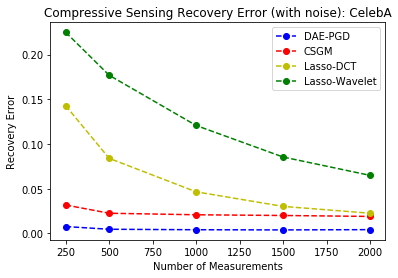

In [34]:
iptplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(ipt250),np.mean(ipt500),np.mean(ipt1000),np.mean(ipt1500),np.mean(ipt2000) ], linestyle='--', marker='o', color='b', label='IPT')
csgmplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(csgm250),np.mean(csgm500),np.mean(csgm1000),np.mean(csgm1500),np.mean(csgm2000) ], linestyle='--', marker='o', color='r', label='CSGM')
dctplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(dct250),np.mean(dct500),np.mean(dct1000),np.mean(dct1500),np.mean(dct2000) ], linestyle='--', marker='o', color='y', label='Lasso-DCT')
waveletplot, = plt.plot([250, 500, 1000,1500, 2000], [np.mean(wv250),np.mean(wv500),np.mean(wv1000),np.mean(wv1500),np.mean(wv2000) ], linestyle='--', marker='o', color='g', label='Lasso-Wavelet')
plt.legend([iptplot, csgmplot, dctplot, waveletplot ], ['DAE-PGD', 'CSGM', 'Lasso-DCT', 'Lasso-Wavelet'])
plt.ylabel('Recovery Error')
plt.xlabel('Number of Measurements')
plt.title('Compressive Sensing Recovery Error (with noise): CelebA')
plt.savefig('cs_recovery_error_with_noise.jpg',bbox_inches='tight')
plt.show()



# CS - CELEBA - No Noise, m = 1000

In [35]:
csgm_dcgan = "csgm-master/estimated/celebA/full-input/gaussian/0.0/1000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/"
csgm_dct = "csgm-master/estimated/celebA/full-input/gaussian/0.0/1000/lasso-dct/0.1/"
csgm_wavelet = "csgm-master/estimated/celebA/full-input/gaussian/0.0/1000/lasso-wavelet/0.1/"
pgd_dcgan = "pgdgan-master/estimated/celebA/full-input/gaussian/1000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_10_100_1/"
ipt= "cs_dae/results/cs_no_noise/celebA/1000/"
original = "cs_dae/data/celebA/"



In [36]:
#celebA
#ipt_imgs = [182674, 182665, 182692, 182681, 182645, 182667, 182640,182694,182699, 182679]
ipt_imgs = [182674, 182665, 182692, 182681, 182640]
others = [a - 182638 for a in ipt_imgs]


In [37]:
def get_super_resol_A(factor, dataset='celebA'):
    if dataset == 'celebA':
        A = np.zeros(shape=(int(64/factor)**2*3, 64*64*3))
        l = 0
        for i in range(int(64/factor)):
            for j in range(int(64/factor)):
                for k in range(3):
                    a = np.zeros(shape=(64, 64, 3))
                    a[factor*i:factor*(i+1), factor*j:factor*(j+1), k] = 1.0/factor**2
                    A[l, :] = np.reshape(a, [1, -1])
                    l += 1
        return A
    else:
        A = np.zeros(shape=(int(28/factor)**2, 28*28))
        l = 0
        for i in range(int(28/factor)):
            for j in range(int(28/factor)):
                a = np.zeros(shape=(28, 28))
                a[factor*i:factor*(i+1), factor*j:factor*(j+1)] = 1.0/factor**2
                A[l, :] = np.reshape(a, [1, -1])
                l += 1
        return A
        

def get_inpaint_A(mask_size, dataset='celebA'):
    if dataset == 'celebA':
        A = np.ones((64, 64,3))
        A[int(64/2 - mask_size/2):int(64/2 + mask_size/2), int(64/2 - mask_size/2):int(64/2 + mask_size/2),:] = 0
        A = A.reshape(-1)
        A = np.diag(A)
    else:
        A = np.ones((28,28))
        A[int(28/2 - mask_size/2):int(28/2 + mask_size/2), int(28/2 - mask_size/2):int(28/2 + mask_size/2)] = 0
        A = A.reshape(-1)
        A = np.diag(A)
        
    return A

In [38]:
#celebA
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)
    

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #pgd-dcgan
    im = image.imread(pgd_dcgan +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #csgm-dct
    im = image.imread(csgm_dct +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #csgm-wave
    im = image.imread(csgm_wavelet +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

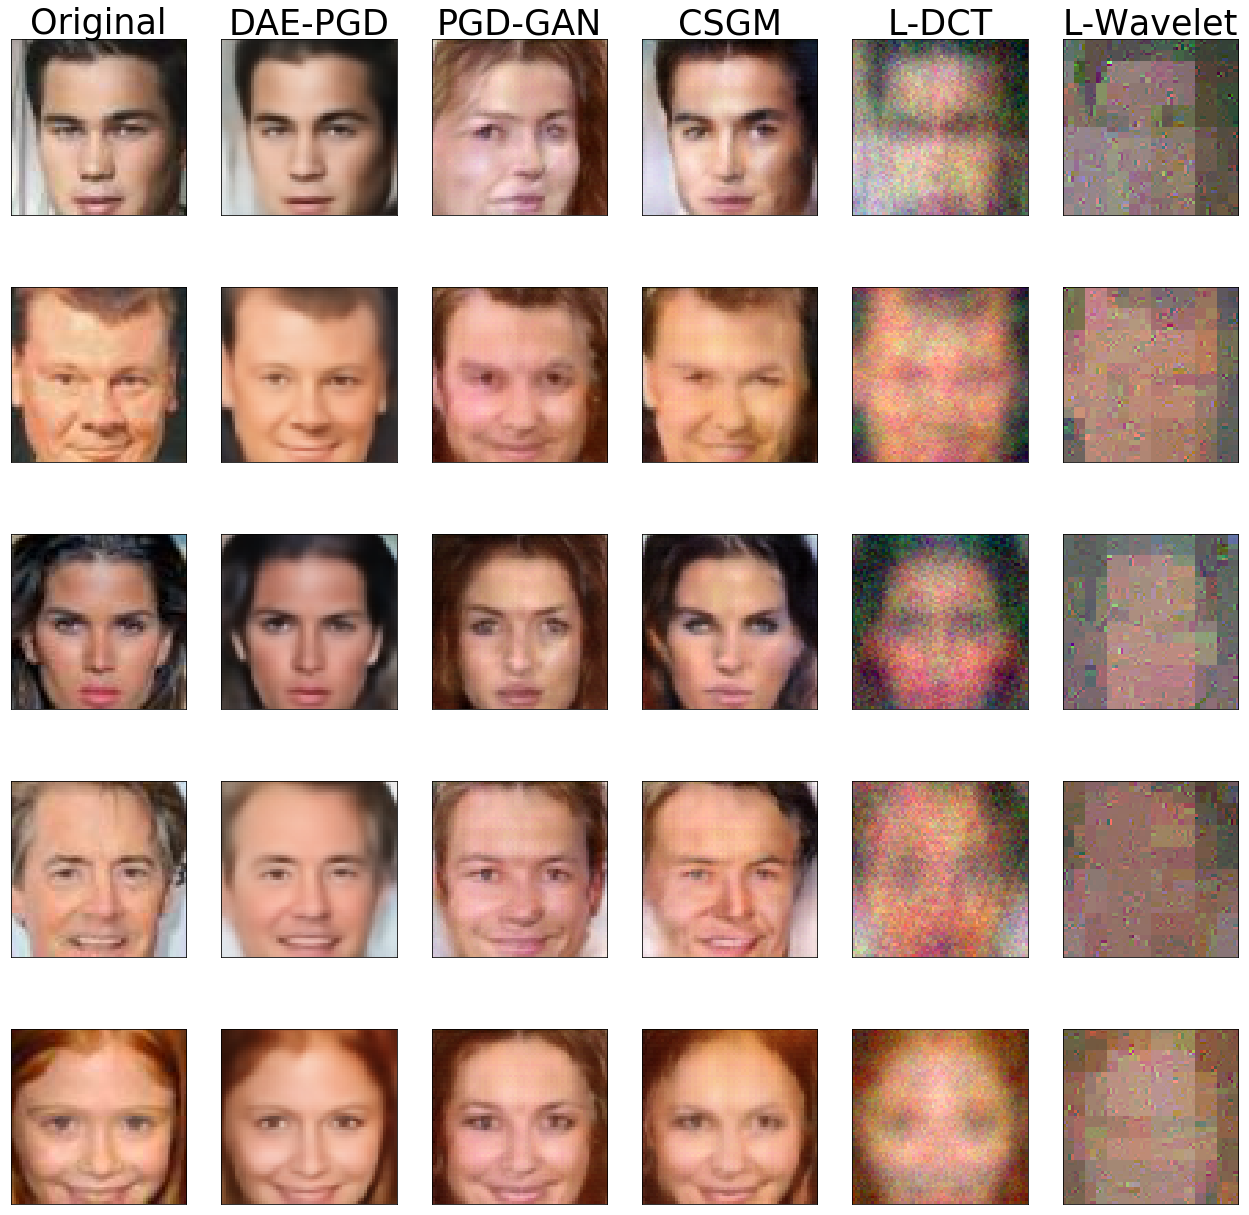

In [39]:
fig, axs = plt.subplots(5, 6, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 2:
        ax.set_title('PGD-GAN', fontsize=35)
    elif ctr == 3:
        ax.set_title('CSGM', fontsize=35)
    elif ctr == 4:
        ax.set_title('L-DCT', fontsize=35)
    elif ctr == 5:
        ax.set_title('L-Wavelet', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('cs_no_noise_1000.jpg',bbox_inches='tight')
    

## CS - MNIST - NO Noise ; m = 100

In [91]:
## mnist
#mnist
ipt_imgs = [7986, 2369,  278, 2460, 6217]#, 8439, 7326, 9675, 4313,  618]

others = [0,1,2,3,4]#5,6,7,8,9]

In [92]:
csgm_dcgan = "csgm-master/estimated/mnist/full-input/gaussian/0.0/100/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/"
csgm_dct = "csgm-master/estimated/mnist/full-input/gaussian/0.0/100/lasso/0.1/"
ipt= "cs_dae/results/cs_no_noise/mnist/100/"
original = "cs_dae/data/mnist/"


In [93]:
#mnist
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((28,28))
    img_arr.append(im)

    #csgm-dct
    im = image.imread(csgm_dct +str(others[i])+ '.png').reshape((28,28))
    img_arr.append(im)

        
    

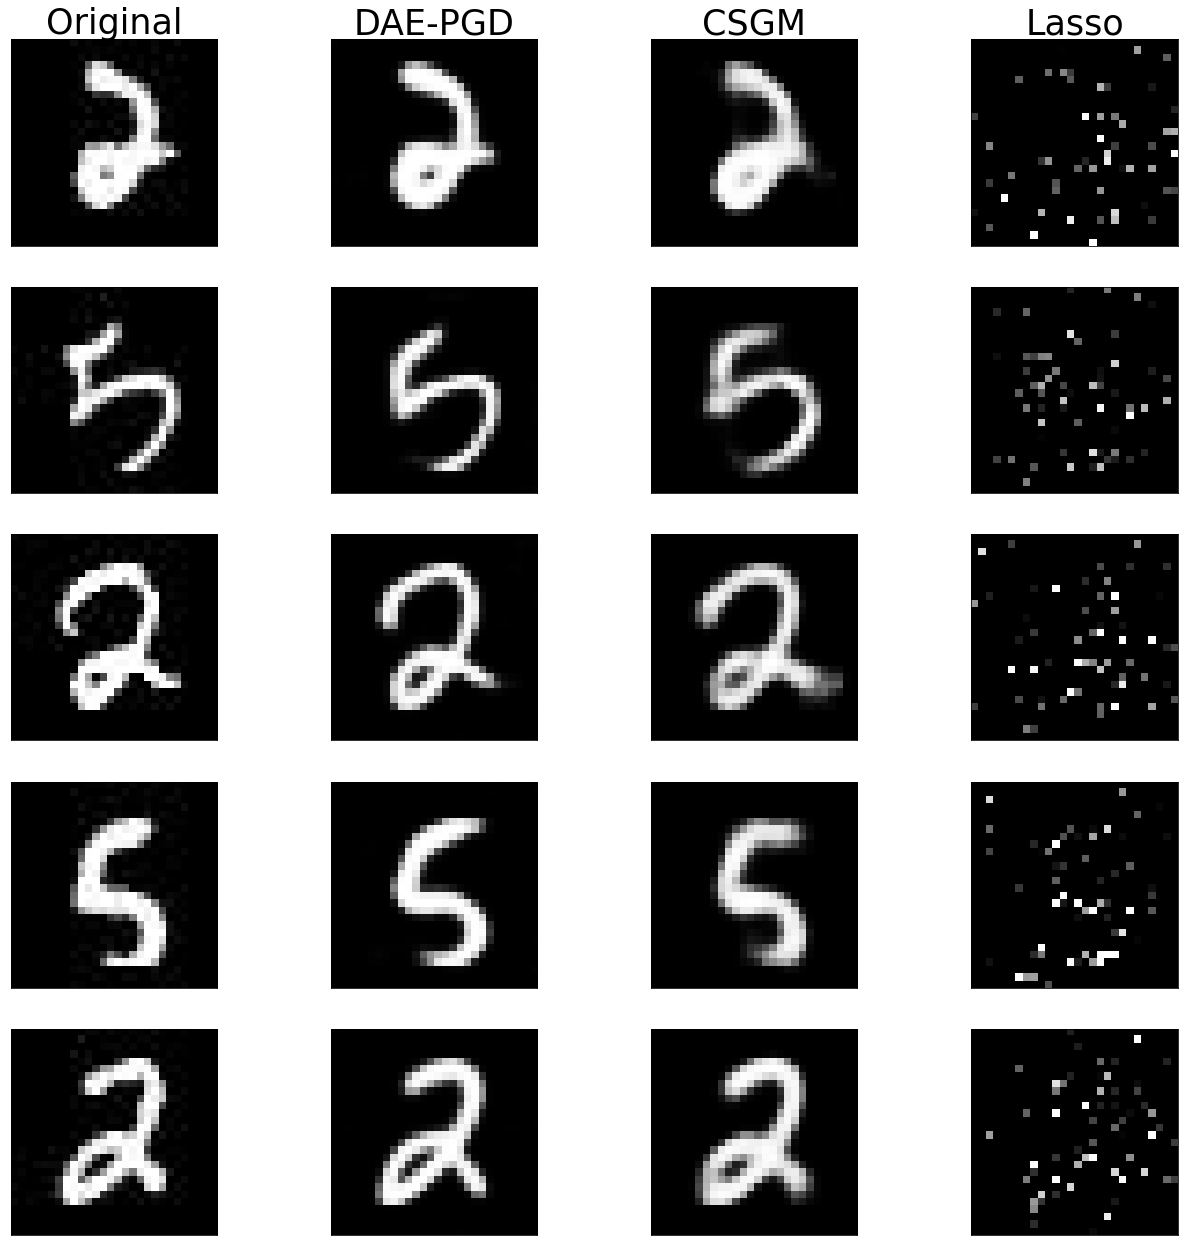

In [94]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    plt.gray()
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 2:
        ax.set_title('CSGM',fontsize=35)
    elif ctr == 3:
        ax.set_title('Lasso', fontsize=35)

        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('cs_mnist_no_noise_100.jpg',bbox_inches='tight')

## CS Noise : m = 1000

In [44]:
csgm_dcgan = "csgm-master/estimated/celebA/full-input/gaussian/0.5/1000/dcgan/0.0_1.0_0.001_0.0_0.0_adam_0.1_0.9_False_500_2/"
csgm_dct = "csgm-master/estimated/celebA/full-input/gaussian/0.5/1000/lasso-dct/0.1/"
csgm_wavelet = "csgm-master/estimated/celebA/full-input/gaussian/0.5/1000/lasso-wavelet/0.1/"
ipt= "cs_dae/results/cs_noise/celebA/1000/"
original = "cs_dae/data/celebA/"

In [45]:
#ipt_imgs = [182674, 182665, 182692, 182681, 182645, 182667, 182640,182694,182699, 182679]
ipt_imgs = [182645, 182667, 182694,182699, 182679]

others = [a - 182638 for a in ipt_imgs]

In [46]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #pgd-dcgan
    im = image.imread(pgd_dcgan +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #csgm-dct
    im = image.imread(csgm_dct +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    #csgm-wave
    im = image.imread(csgm_wavelet +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)
        

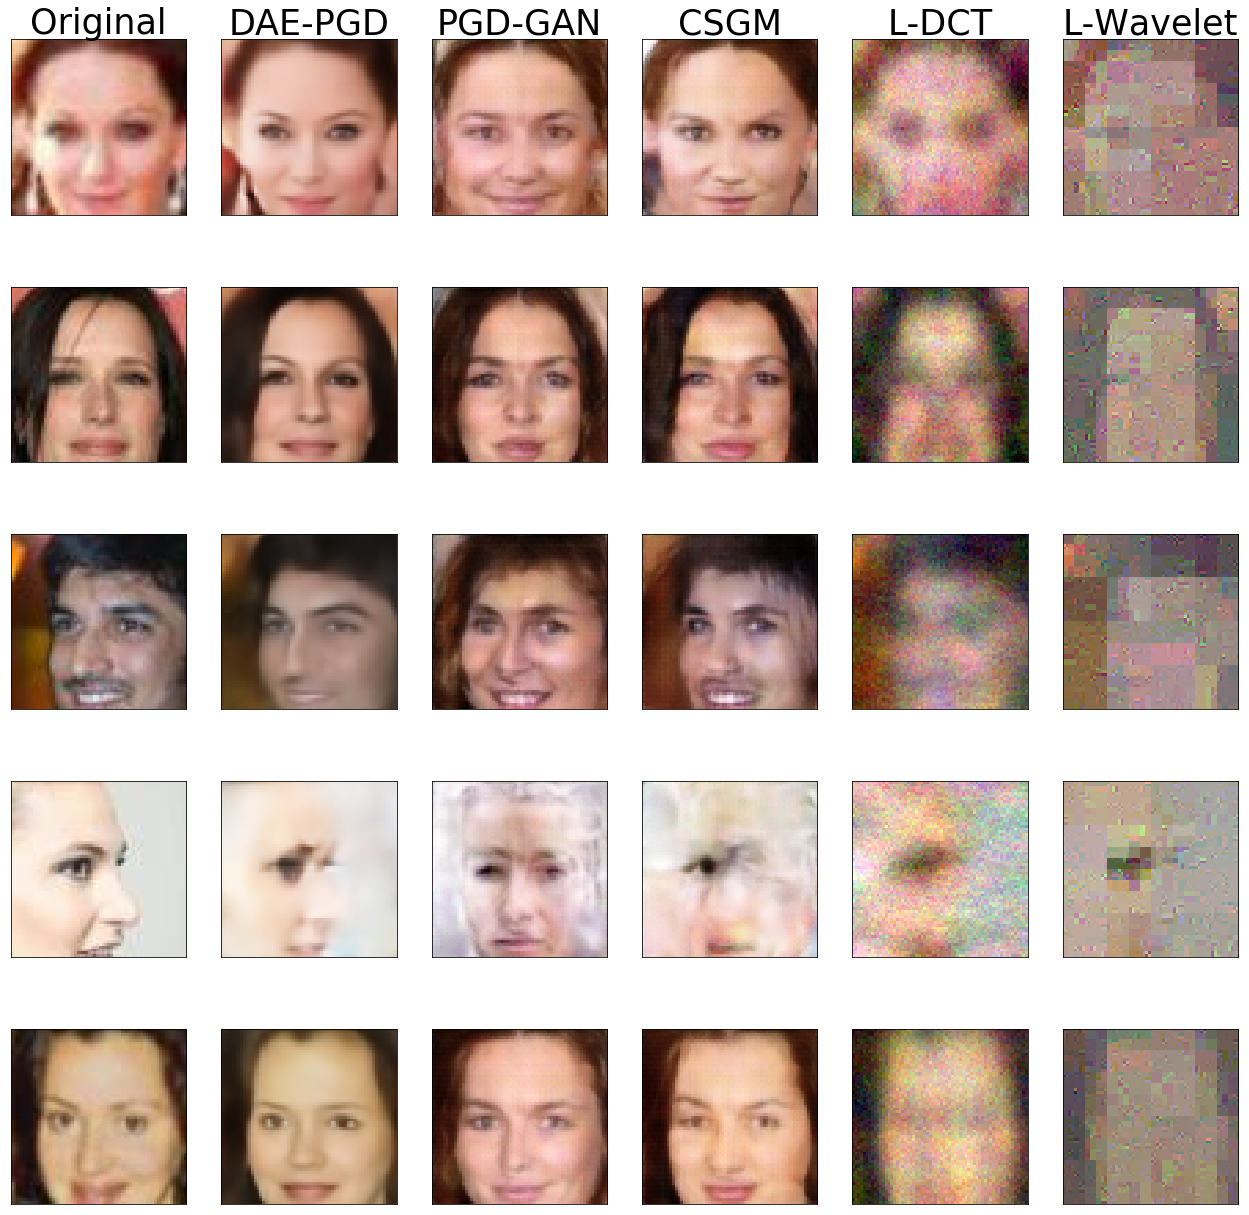

In [47]:
fig, axs = plt.subplots(5, 6, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original',fontsize=35)
    elif ctr == 1:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 2:
        ax.set_title('PGD-GAN',fontsize=35)
    elif ctr == 3:
        ax.set_title('CSGM', fontsize=35)
    elif ctr == 4:
        ax.set_title('L-DCT',fontsize=35)
    elif ctr == 5:
        ax.set_title('L-Wavelet', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('cs_noise_1000.jpg',bbox_inches='tight')

## CS MNIST Noise; m = 100

In [48]:
## mnist
#mnist
#ipt_imgs = [7986, 2369,  278, 2460, 6217]#, 
ipt_imgs = [8439, 7326, 9675, 4313,  618]

#others = [0,1,2,3,4]
others = [5,6,7,8,9]

In [49]:
ipt= "cs_dae/results/cs_noise/mnist/100/"
original = "cs_dae/data/mnist/"
ipt_imgs = [7986, 2369,  278, 2460, 6217]

In [50]:
csgm_dcgan = "csgm-master/estimated/mnist/full-input/gaussian/0.5/100/vae/0.0_1.0_0.1_adam_0.01_0.9_False_1000_10/"
csgm_dct = "csgm-master/estimated/mnist/full-input/gaussian/0.5/100/lasso/0.1/"
ipt= "cs_dae/results/cs_noise/mnist/100/"
original = "cs_dae/data/mnist/"

In [51]:
#mnist
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((28,28))
    img_arr.append(im)

    #csgm-dct
    im = image.imread(csgm_dct +str(others[i])+ '.png').reshape((28,28))
    img_arr.append(im)


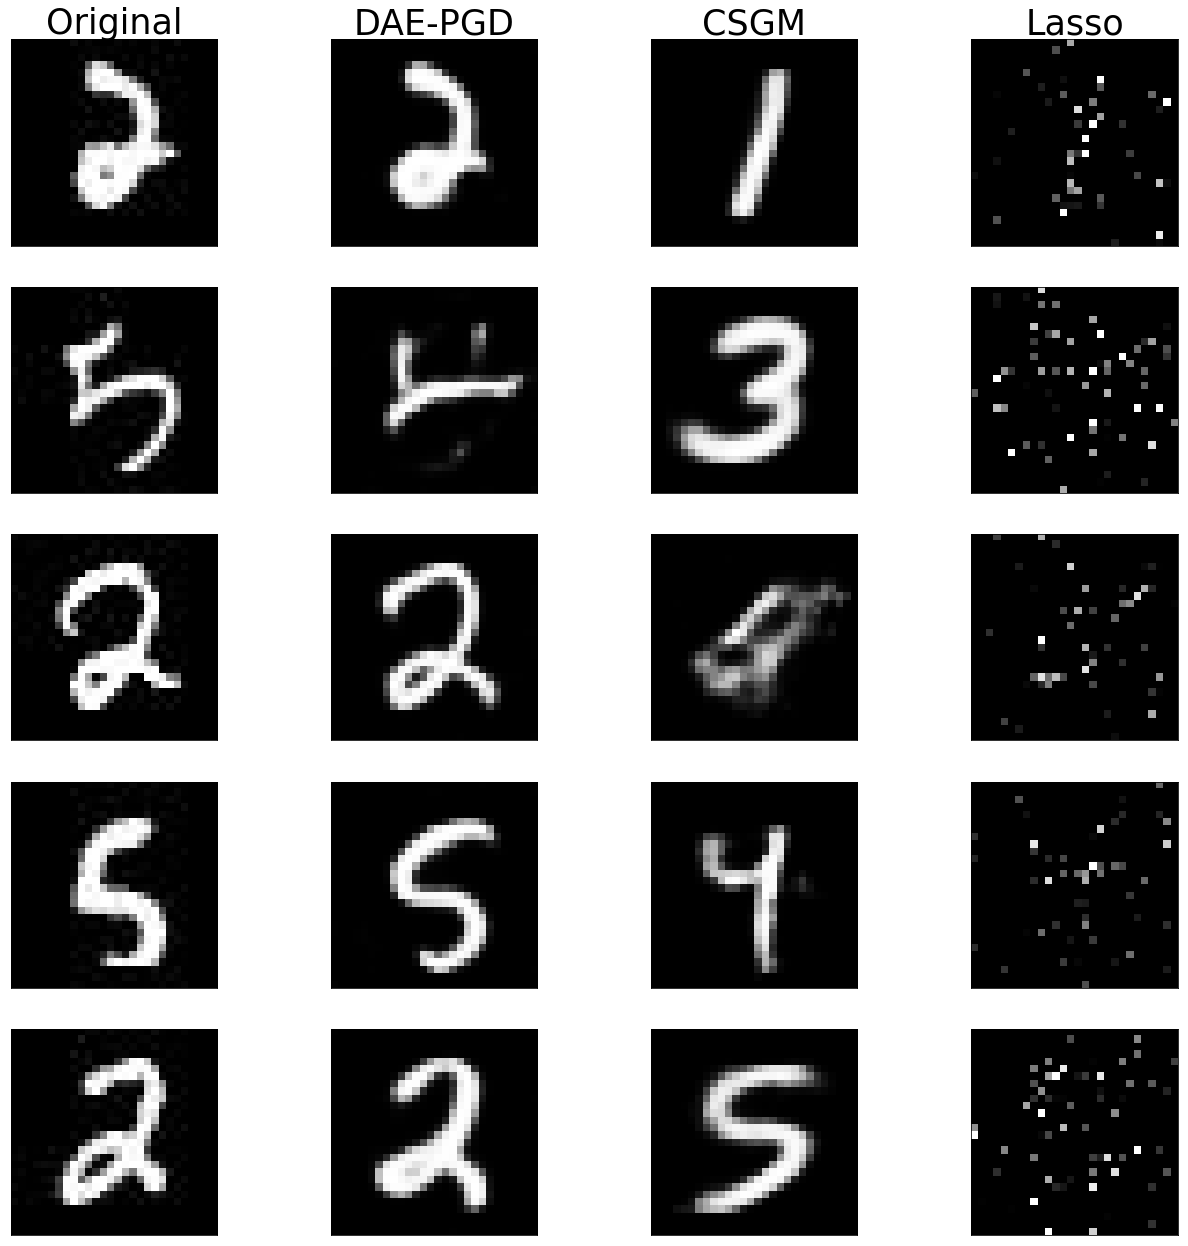

In [52]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    plt.gray()
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 2:
        ax.set_title('CSGM', fontsize=35)
    elif ctr == 3:
        ax.set_title('Lasso', fontsize=35)

        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('cs_mnist_noise_100.jpg',bbox_inches='tight')

# CS No Noise: IPT for different m

In [53]:
ipt= "cs_dae/results/cs_no_noise/celebA/"
original = "cs_dae/data/celebA/"

In [54]:
ipt_imgs = [182674, 182665, 182692, 182681, 182640]

In [55]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)
    
         #iptz
    im = image.imread(ipt + '250/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)


    #ipt
    im = image.imread(ipt  + '500/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '750/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '1000/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '1500/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)


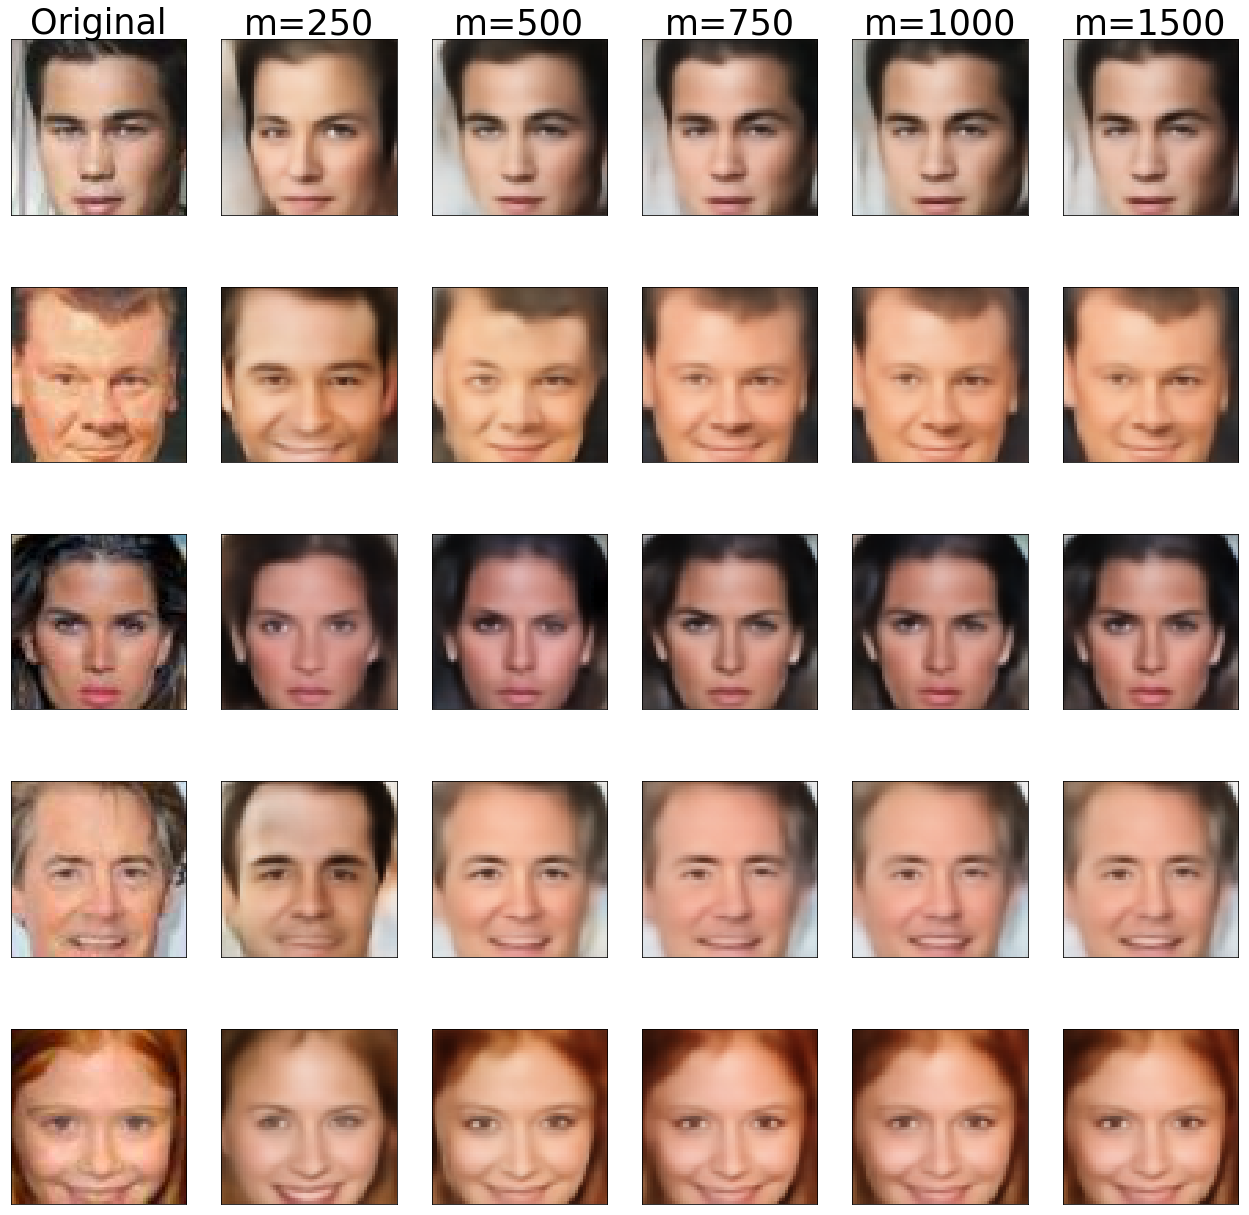

In [56]:
fig, axs = plt.subplots(5, 6, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original',fontsize=35)
    elif ctr == 1:
        ax.set_title('m=250', fontsize=35)
    elif ctr == 2:
        ax.set_title('m=500', fontsize=35)
    elif ctr == 3:
        ax.set_title('m=750',fontsize=35)
    elif ctr == 4:
        ax.set_title('m=1000', fontsize=35)
    elif ctr == 5:
        ax.set_title('m=1500', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('cs_no_noise_ipt_m.jpg',bbox_inches='tight')

# Superres: IPT for different f

In [57]:
ipt= "cs_dae/results/superresolution/celebA/"
original ='cs_dae/data/celebA/'

In [58]:
#ipt_imgs = [182639, 182697, 182694, 182658, 182687, 
ipt_imgs = [182695, 182676, 182690,182675,182686]

In [59]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)
    
#ipt
    im = image.imread(ipt + '2/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)


    #ipt
    im = image.imread(ipt  + '3/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '4/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

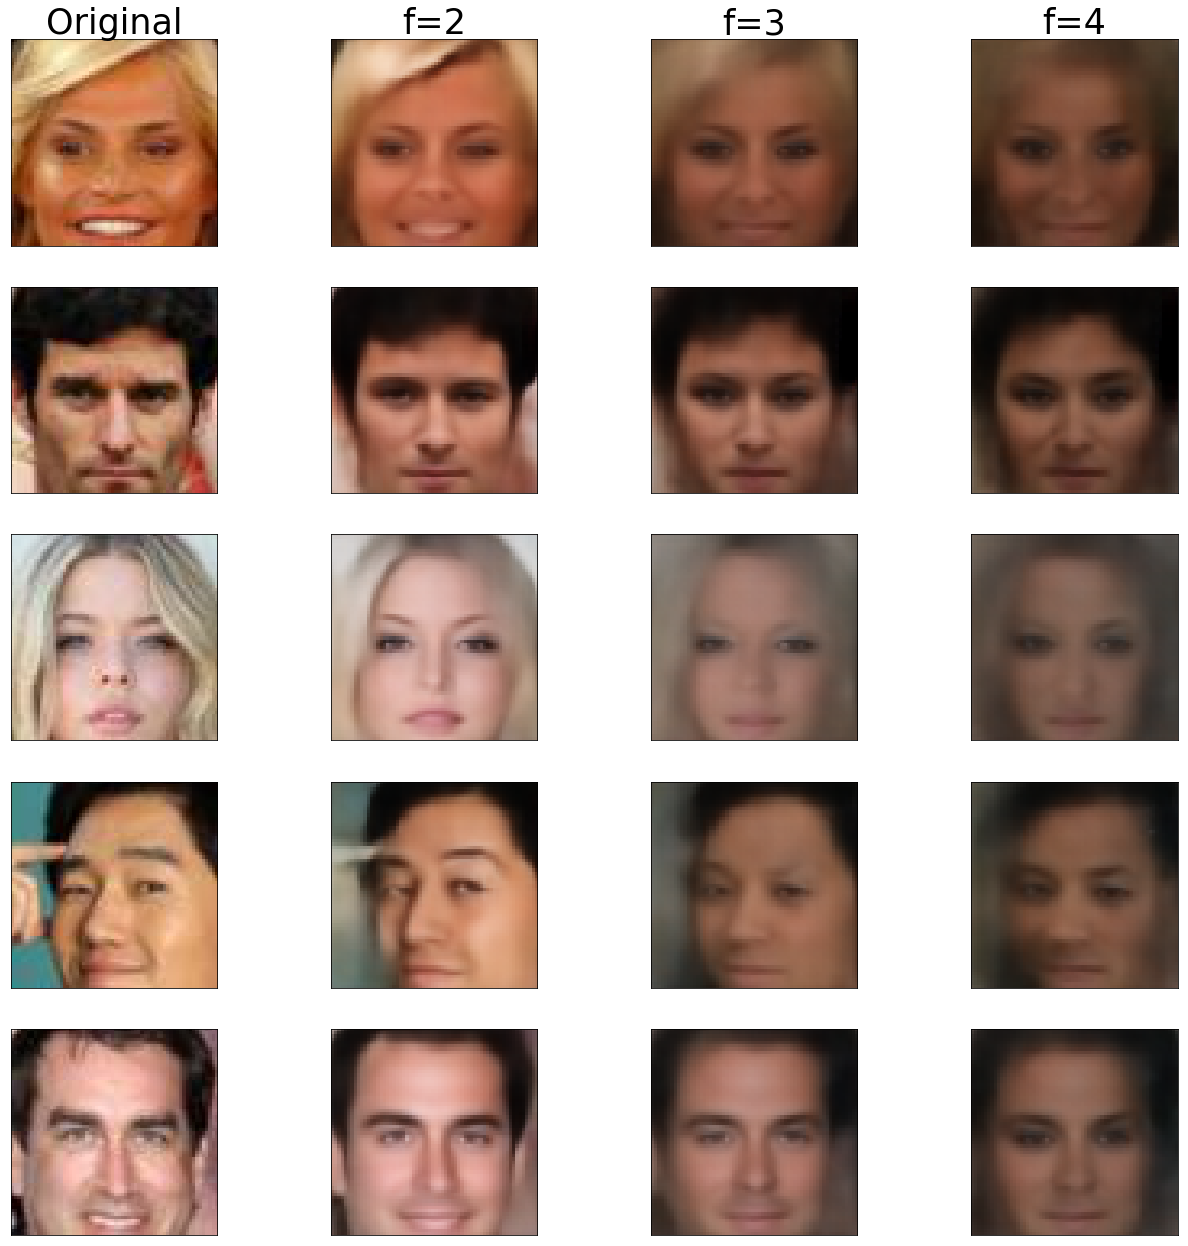

In [60]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('f=2', fontsize=35)
    elif ctr == 2:
        ax.set_title('f=3', fontsize=35)
    elif ctr == 3:
        ax.set_title('f=4',fontsize=35)

    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('superres_celeba_diff_m.jpg',bbox_inches='tight')

## Mnist CS: different m

In [61]:
ipt= "cs_dae/results/cs_no_noise/mnist/"
original = "cs_dae/data/mnist/"
ipt_imgs = [7986, 2369,  278, 2460, 6217]

In [62]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)
    
         #ipt
    im = image.imread(ipt + '25/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)


    #ipt
    im = image.imread(ipt  + '50/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '75/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '100/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '150/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

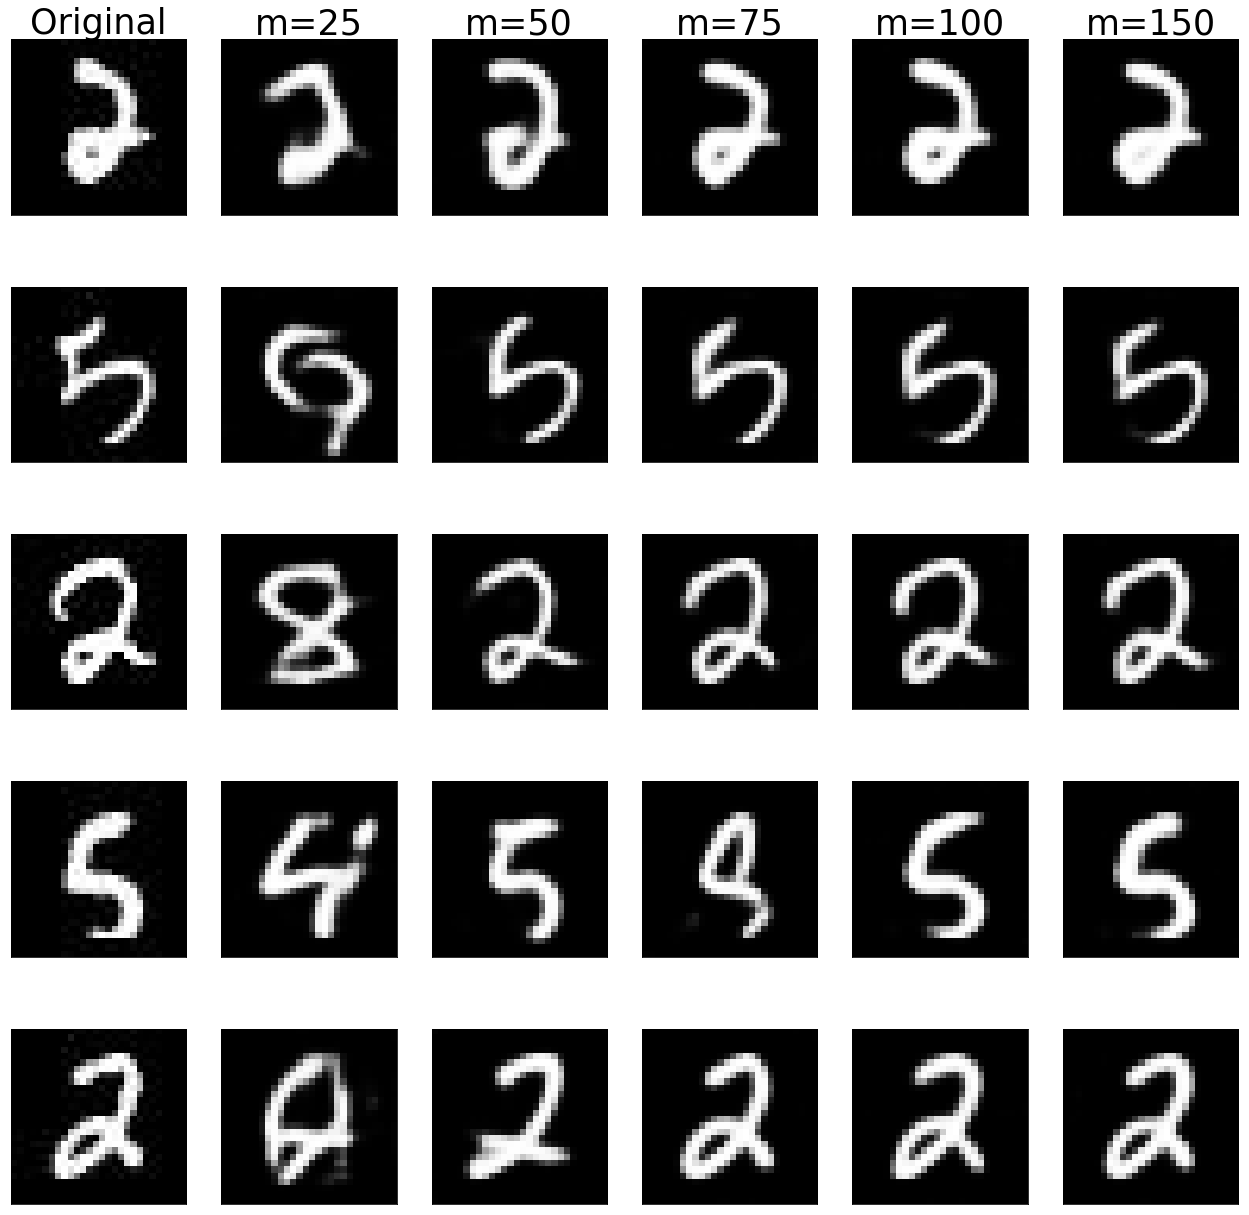

In [63]:
fig, axs = plt.subplots(5, 6, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('m=25', fontsize=35)
    elif ctr == 2:
        ax.set_title('m=50', fontsize=35)
    elif ctr == 3:
        ax.set_title('m=75', fontsize=35)
    elif ctr == 4:
        ax.set_title('m=100', fontsize=35)
    elif ctr == 5:
        ax.set_title('m=150', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('cs_mnist_no_noise_ipt_m.jpg',bbox_inches='tight')

# Inpaint - CELEBA - No Noise, m = 10

In [64]:
csgm_dcgan = "csgm-master/estimated/celebA/full-input/inpaint/0.0/12288/10/0.0_1.0_0.0_0.0_0.0_adam_0.1_0.9_False_500_2/"
ipt= "cs_dae/results/inpainting/celebA/10/"
original = "cs_dae/data/celebA/"


In [65]:
#celebA
ipt_imgs = [182689, 182669, 182652, 182655, 182664]#, 182681, 182688, 182675,182674,182698]
others = [a - 182638 for a in ipt_imgs]


In [66]:
#celebA
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)
    
    im_ = np.dot(get_inpaint_A(mask_size=10), im.flatten())
    img_arr.append(im_.reshape((64,64,3)))

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)


    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    

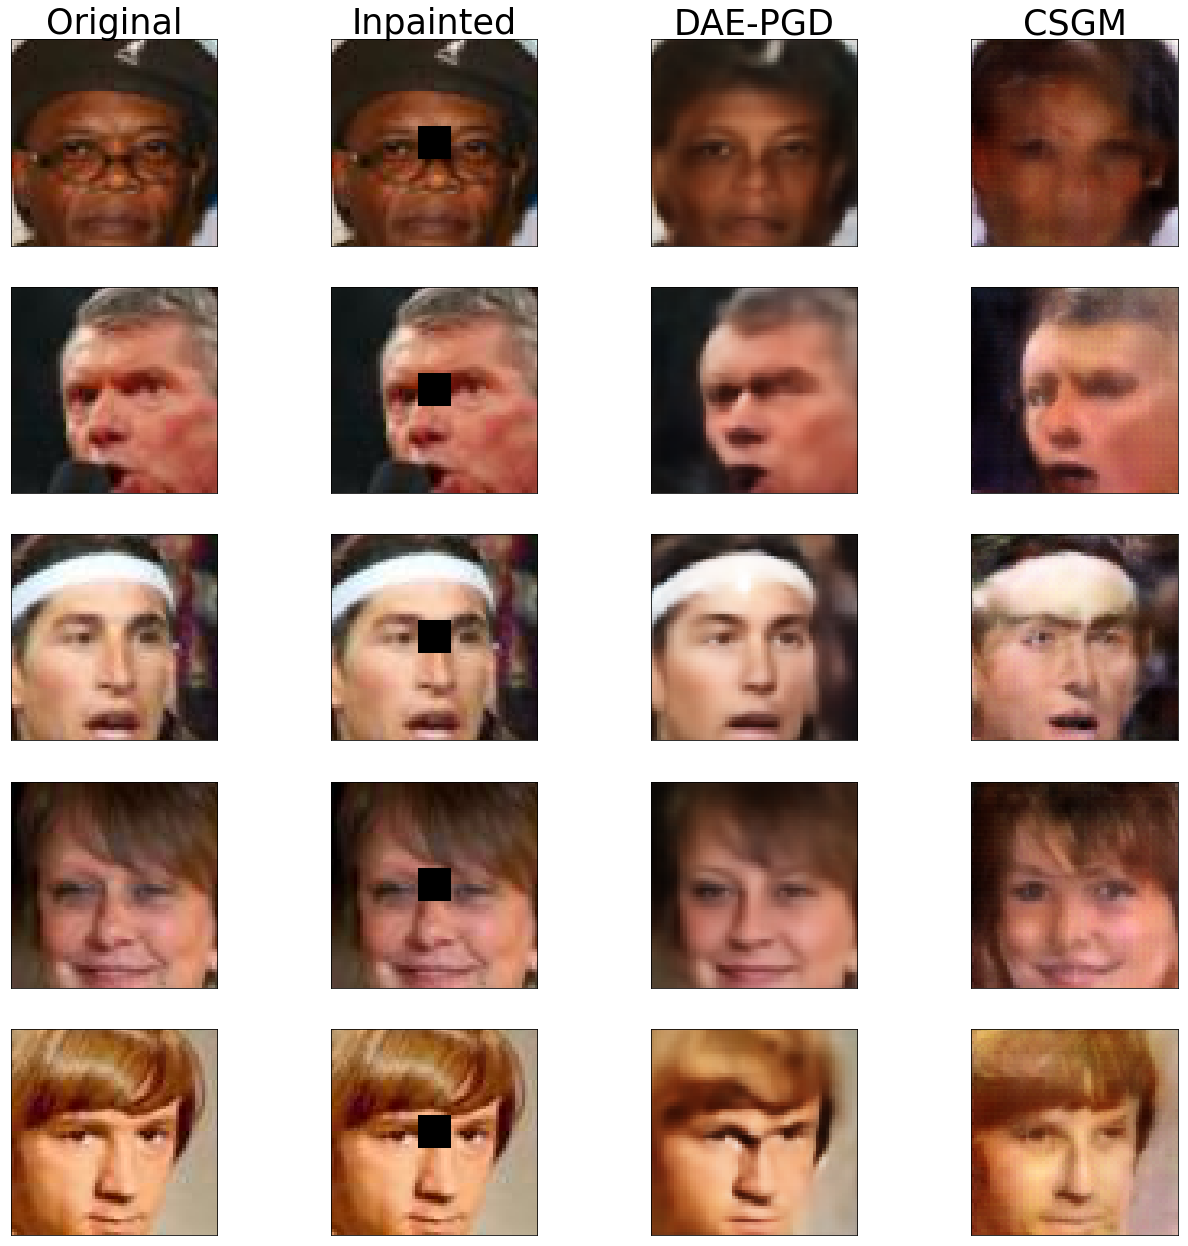

In [67]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('Inpainted', fontsize=35)
    elif ctr == 2:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 3:
        ax.set_title('CSGM', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('inpaint_celeba_10.jpg',bbox_inches='tight')
    

# Superres - CELEBA - f = 2

In [68]:
csgm_dcgan = "csgm-master/estimated/celebA/full-input/superres/3072/1/2/dcgan/0.0_1.0_0.0_0.0_0.0_adam_0.1_0.9_False_500_2/"
ipt= "cs_dae/results/superresolution/celebA/2/"
original = "cs_dae/data/celebA/"


In [69]:
#celebA
ipt_imgs = [182639, 182697, 182694, 182658, 182687]#, 182695, 182676, 182690,182675,182686]
others = [a - 182638 for a in ipt_imgs]


In [70]:
#celebA
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)
    
    im_ = np.dot(get_super_resol_A(factor=2), im.flatten())
    img_arr.append(im_.reshape((32,32,3)))

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)


    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

    

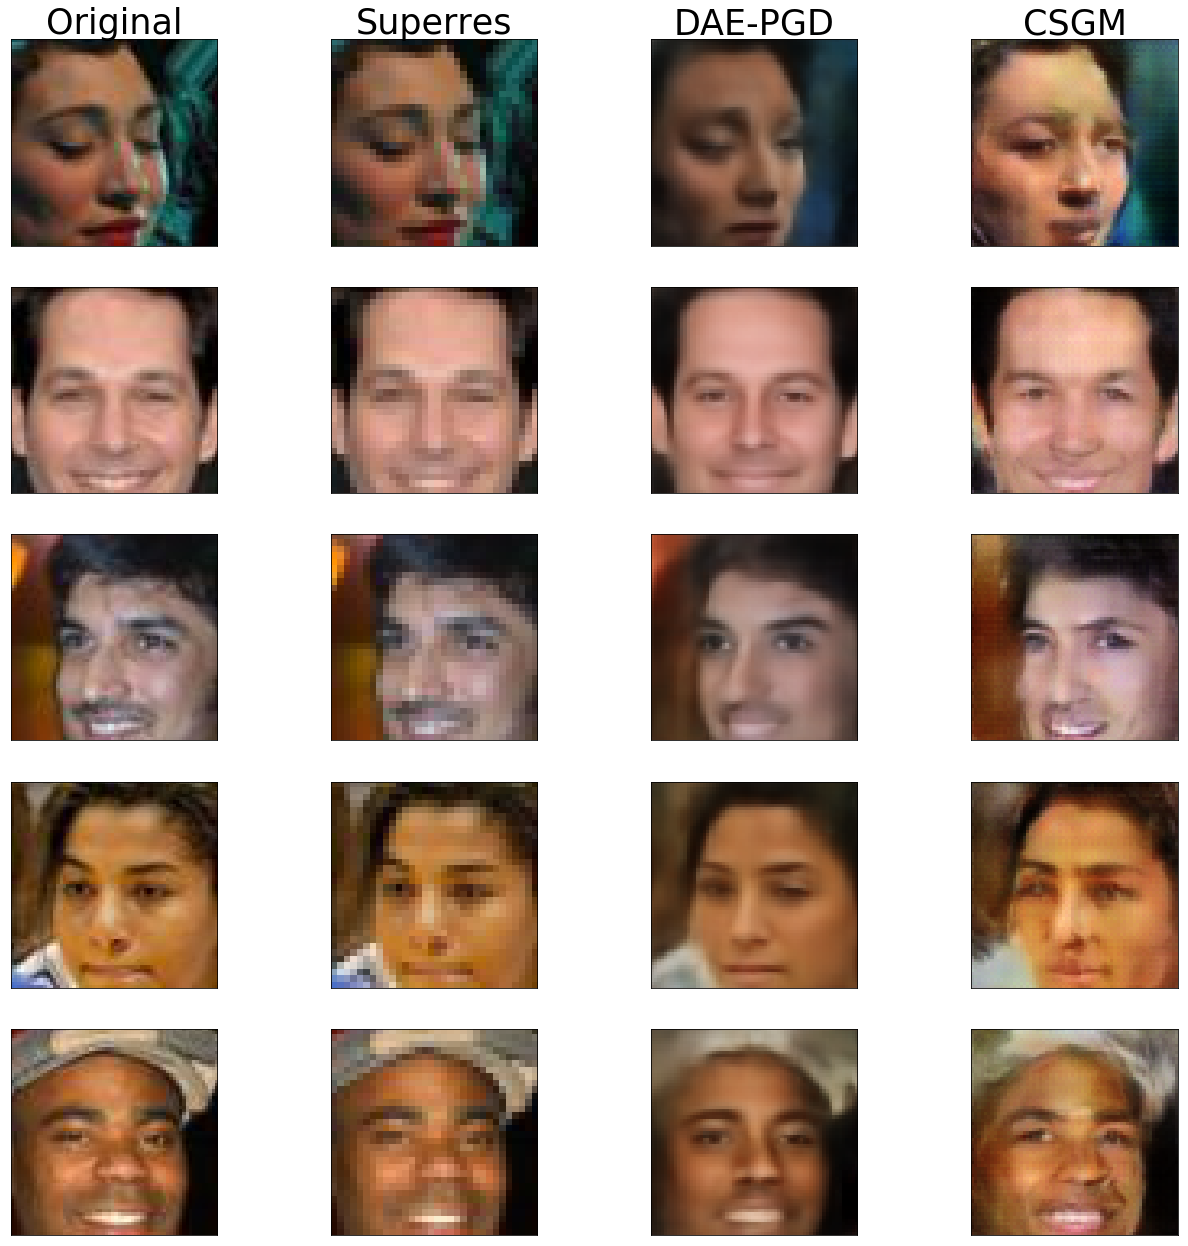

In [71]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('Superres', fontsize=35)
    elif ctr == 2:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 3:
        ax.set_title('CSGM', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('superres_celeba_2.jpg',bbox_inches='tight')
    

## Mnist Superres: different m

In [118]:
ipt= "cs_dae/results/superresolution/mnist/"
original = "cs_dae/data/mnist/"
#ipt_imgs = [7986, 2369,  278, 2460, 6217, 8439, 7326, 9675, 4313,  618]
ipt_imgs =  [5938, 3531, 4275, 9969, 2103]

In [119]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)
    
         #ipt
    im = image.imread(ipt + '2/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)


    #ipt
    im = image.imread(ipt  + '3/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '4/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)


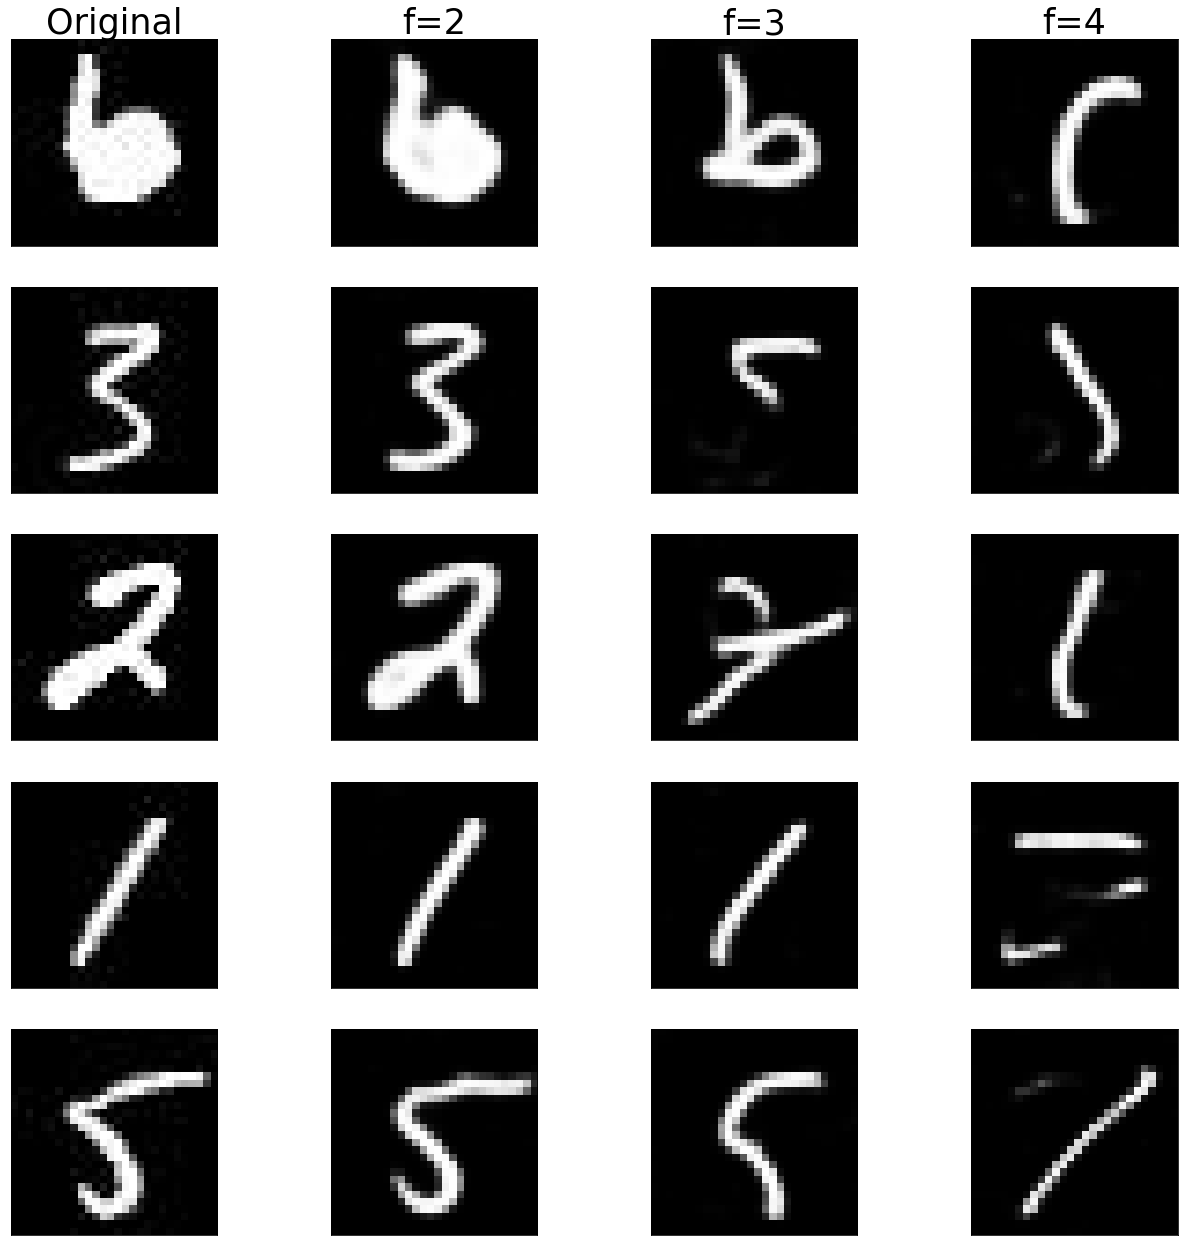

In [120]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('f=2', fontsize=35)
    elif ctr == 2:
        ax.set_title('f=3', fontsize=35)
    elif ctr == 3:
        ax.set_title('f=4', fontsize=35)
    
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('superres_mnist_diff_m.jpg',bbox_inches='tight')

## Mnist Inpaint: different m

In [75]:
ipt= "cs_dae/results/inpainting/mnist/"
original = "cs_dae/data/mnist/"
ipt_imgs = [9942, 6654, 7114, 3727, 5891]


In [76]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)
    
         #ipt
    im = image.imread(ipt + '5/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)


    #ipt
    im = image.imread(ipt  + '10/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '15/'+str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)


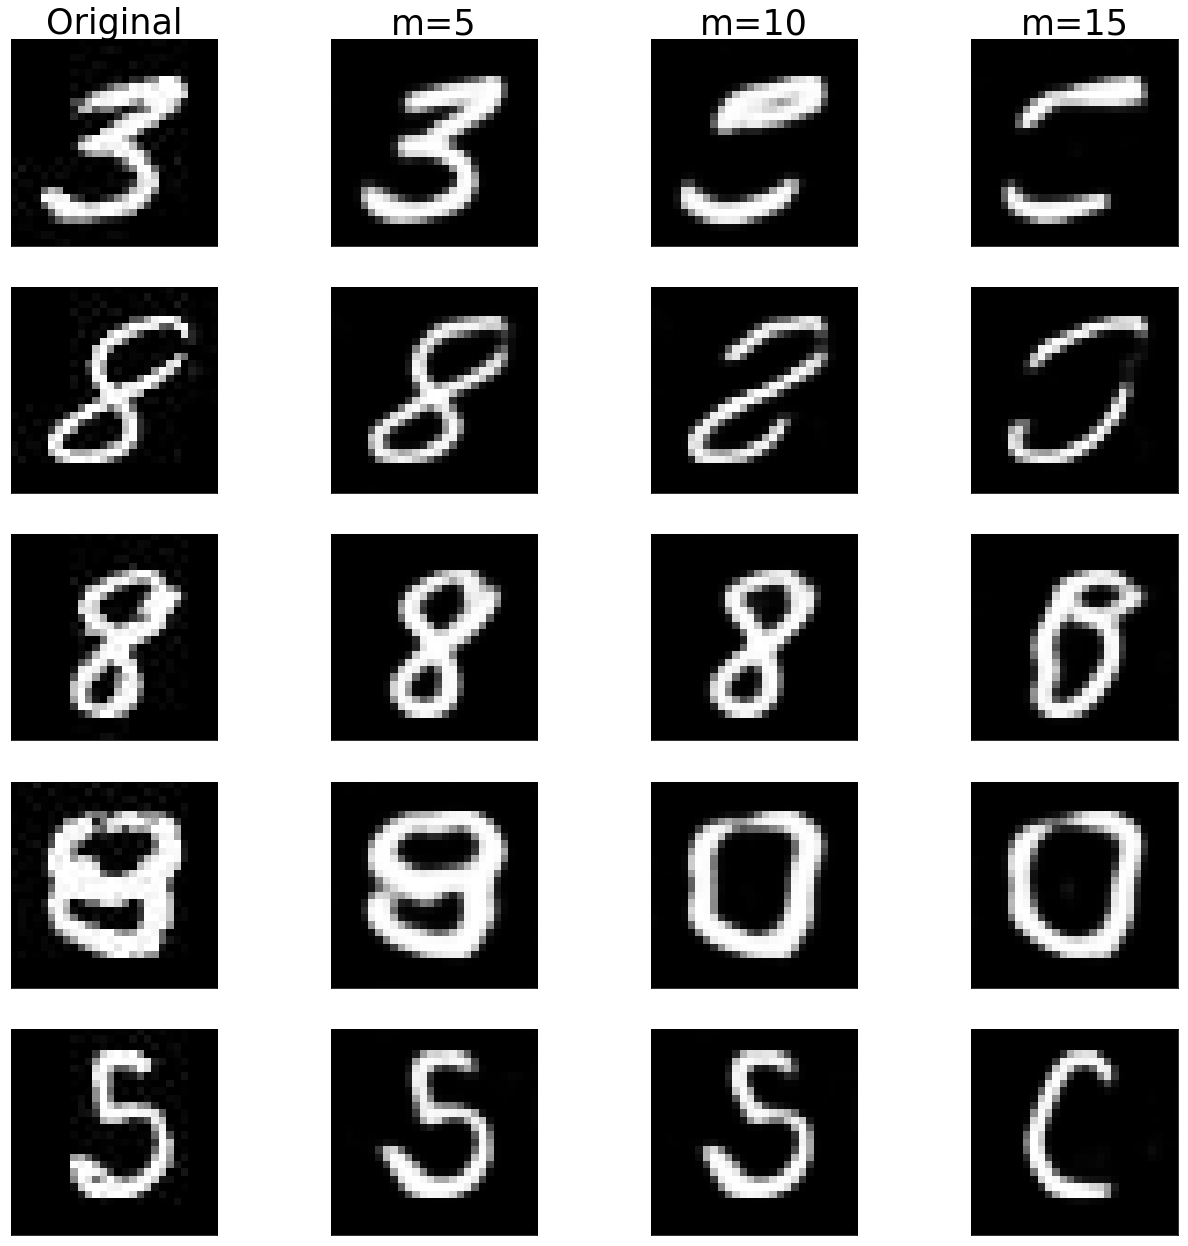

In [77]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('m=5', fontsize=35)
    elif ctr == 2:
        ax.set_title('m=10', fontsize=35)
    elif ctr == 3:
        ax.set_title('m=15', fontsize=35)
    
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('inpaint_mnist_diff_m.jpg',bbox_inches='tight')

## Inpaint MNIST m = 5

In [78]:
## mnist
#mnist
ipt_imgs =  [4598, 1337,  859, 4345, 8342]#, 9942, 6654, 7114, 3727, 5891]
others = [20,21,22,23,24]

In [79]:
csgm_dcgan = "csgm-master/estimated/mnist/full-input/inpaint/0.0/784/10/0.0_1.0_0.0_momentum_0.1_0.9_False_100_10/"
ipt= "cs_dae/results/inpainting/mnist/10/"
original = "cs_dae/data/mnist/"

In [80]:
#mnist
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)
    
    im_ = np.dot(get_inpaint_A(mask_size=10 , dataset='mnist'), im.flatten())
    img_arr.append(im_.reshape((28,28)))

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((28,28))
    img_arr.append(im)


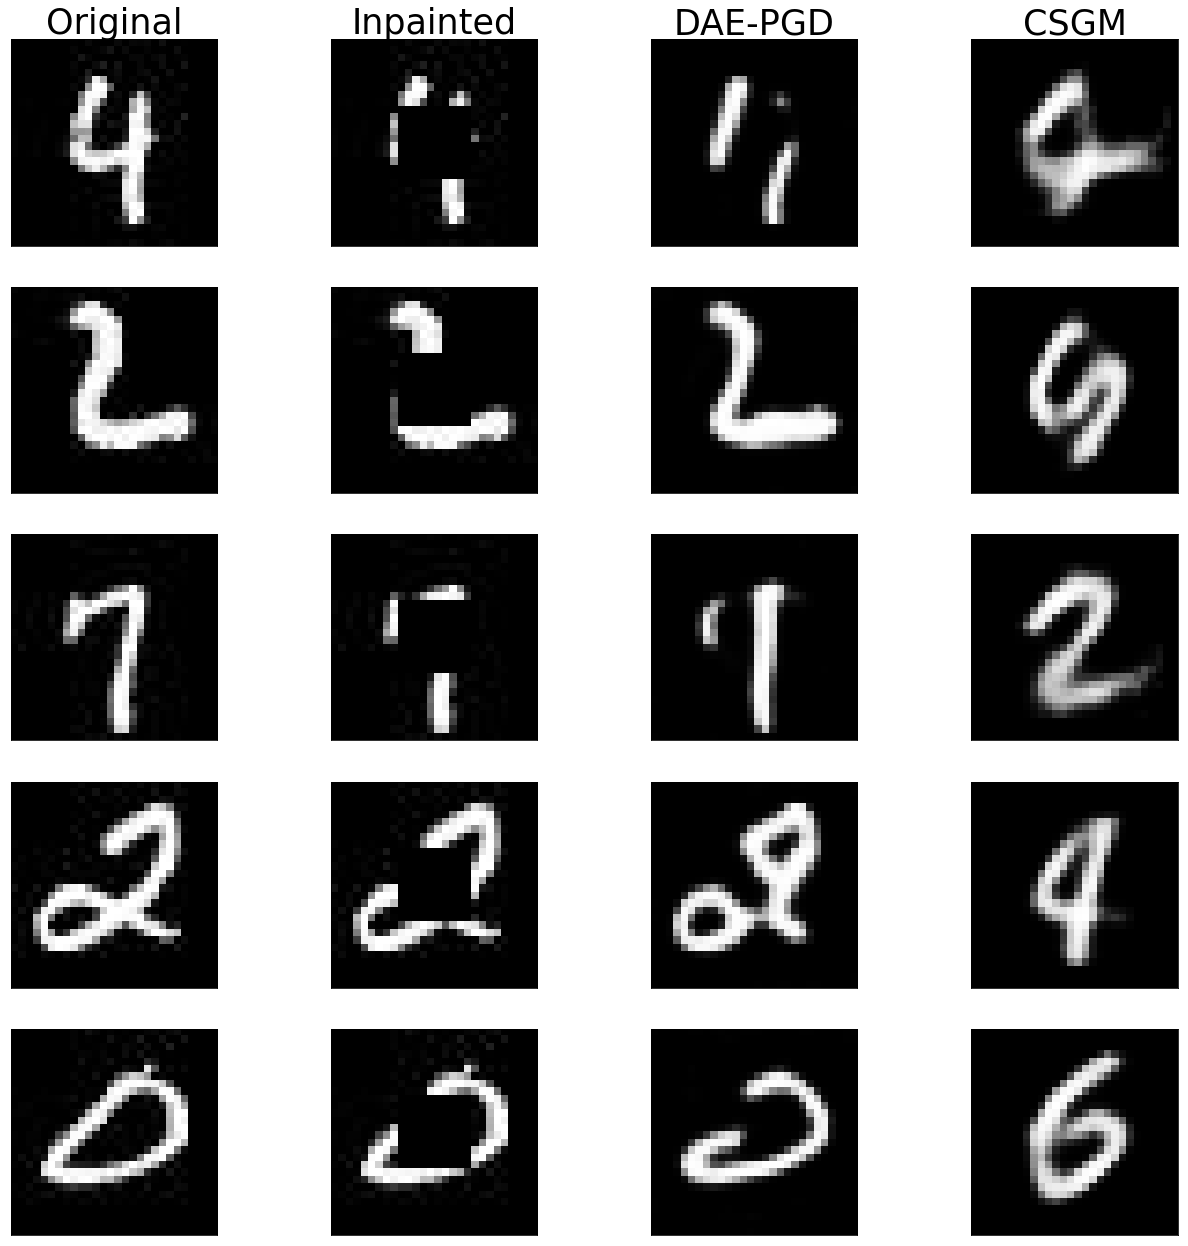

In [81]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    plt.gray()
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('Inpainted', fontsize=35)
    elif ctr == 2:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 3:
        ax.set_title('CSGM', fontsize=35)
   
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('inpaint_mnist_m_10.jpg',bbox_inches='tight')

## Superres MNIST f=2

In [108]:
## mnist
#mnist
ipt_imgs =    [5938, 3531, 4275, 9969, 2103]#, 3557, 8480, 5513, 9482, 2757]
others = [10,11,12,13,14]

In [115]:
csgm_dcgan = "csgm-master/estimated/mnist/full-input/superres/196/1/2/vae/0.0_1.0_0.1_momentum_0.01_0.9_False_500_10/"
ipt= "cs_dae/results/superresolution/mnist/2/"
original = "cs_dae/data/mnist/"

In [116]:
#mnist
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((28,28))/255.
    img_arr.append(im)
    
    im_ = np.dot(get_super_resol_A(factor=2, dataset='mnist'), im.flatten())
    img_arr.append(im_.reshape((14,14)))

    #ipt
    im = image.imread(ipt +str(ipt_imgs[i])+ '.png').reshape((28,28))
    img_arr.append(im)

    #csgm-dcgan
    im = image.imread(csgm_dcgan +str(others[i])+ '.png').reshape((28,28))
    img_arr.append(im)


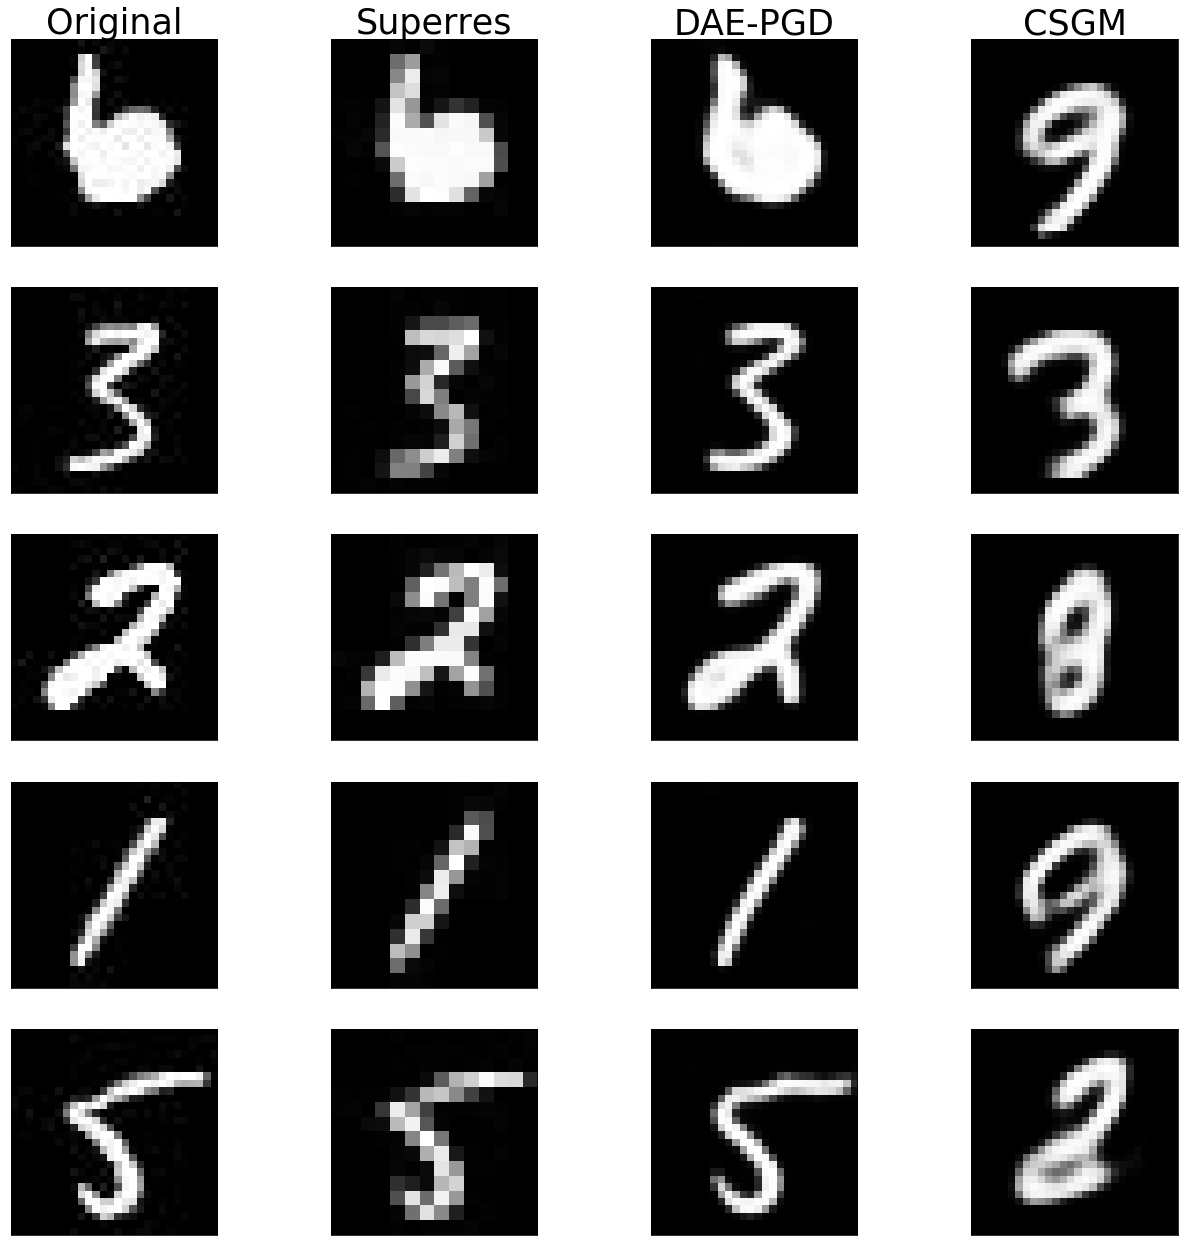

In [117]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    plt.gray()
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('Superres', fontsize=35)
    elif ctr == 2:
        ax.set_title('DAE-PGD', fontsize=35)
    elif ctr == 3:
        ax.set_title('CSGM', fontsize=35)
   
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('superres_mnist_f2.jpg',bbox_inches='tight')

# CS No Noise: IPT for different m

In [86]:
ipt= "cs_dae/results/inpainting/celebA/"
original = 'cs_dae/data/celebA/'


In [87]:
#ipt_imgs = [182689, 182669, 182652, 182655, 182664]#, 
ipt_imgs = [182681, 182688, 182675,182674,182698]


In [88]:
img_arr = []
#original and ipt
for i in range(len(ipt_imgs)):
    im = image.imread(original +str(ipt_imgs[i])+ '.jpg').reshape((64,64,3))/255.
    img_arr.append(im)
    
         #ipt
    im = image.imread(ipt + '10/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)


    #ipt
    im = image.imread(ipt  + '15/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)

     #ipt
    im = image.imread(ipt + '20/'+str(ipt_imgs[i])+ '.png').reshape((64,64,3))
    img_arr.append(im)



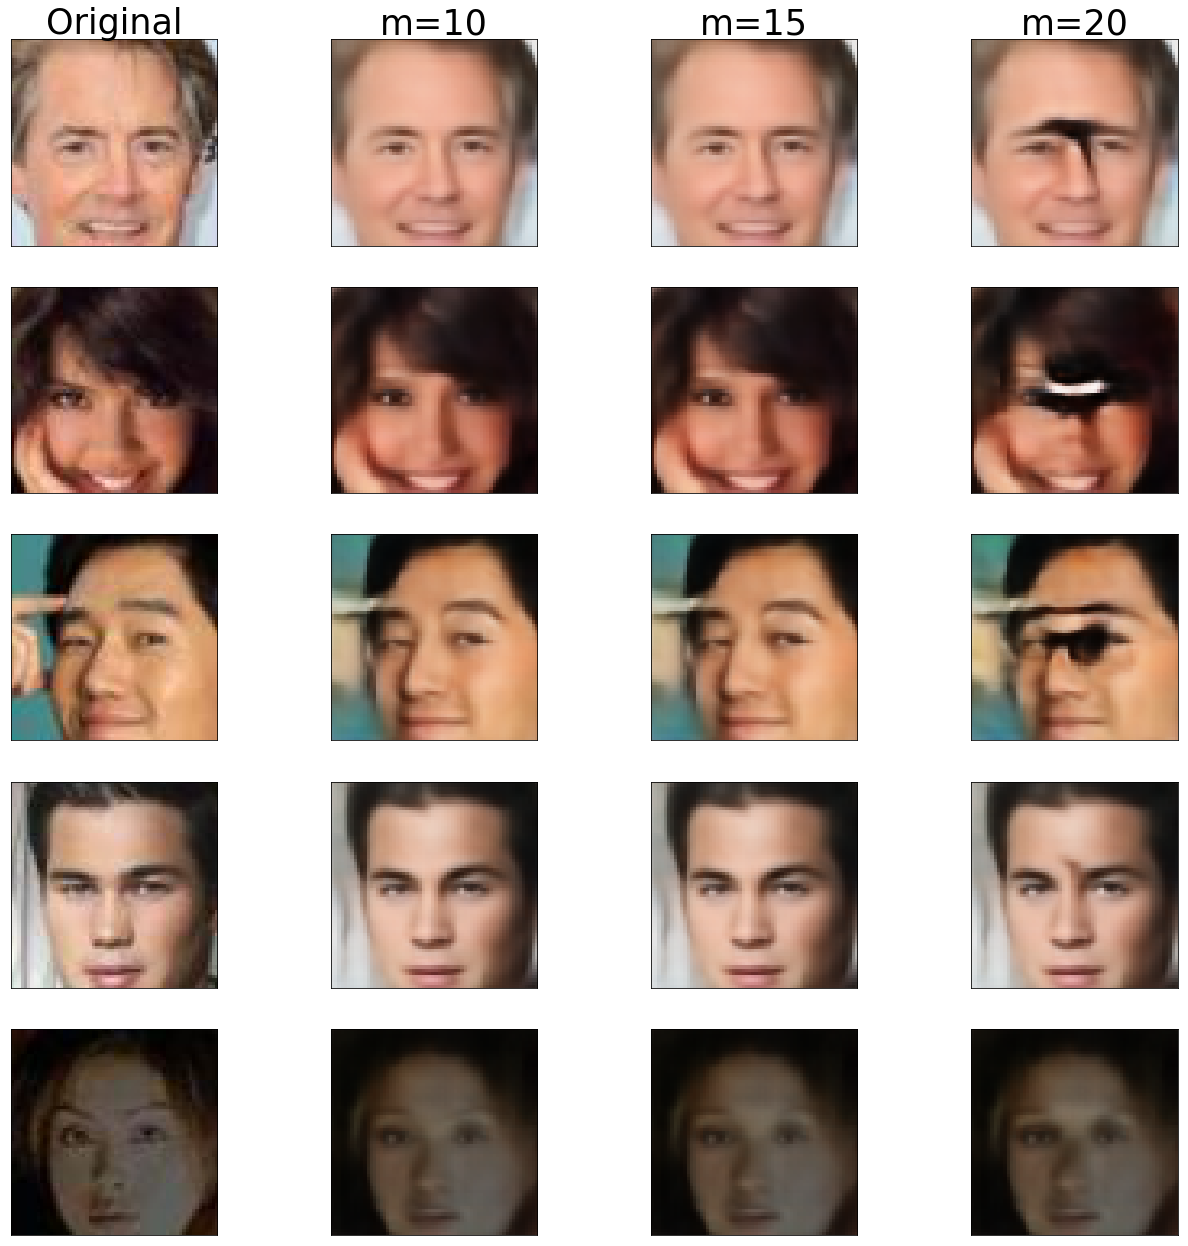

In [89]:
fig, axs = plt.subplots(5, 4, figsize=(22, 22))
#fig.tight_layout() 
axs = axs.flatten()
ctr = 0
for img, ax in zip(img_arr, axs):
    ax.imshow(img)
    if ctr == 0:
        ax.set_title('Original', fontsize=35)
    elif ctr == 1:
        ax.set_title('m=10', fontsize=35)
    elif ctr == 2:
        ax.set_title('m=15', fontsize=35)
    elif ctr == 3:
        ax.set_title('m=20', fontsize=35)
    
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ctr+=1
#plt.subplots_adjust(left=0.5, right=0.61, bottom=0.2, top=0.4)
#plt.subplots_adjust(left=0.05, bottom=0.05, right=0.01, top=0.01, wspace=0.01, hspace=0.01) 
plt.show()
fig.savefig('inpaint_celebA_m.jpg',bbox_inches='tight')